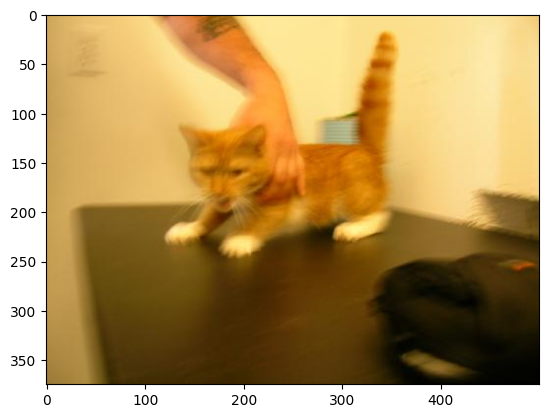

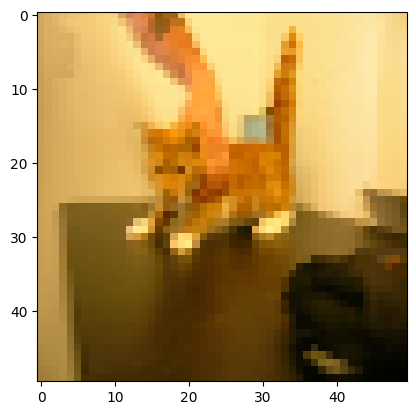

24946
1
0
1
1
1
0
1
1
1
0


c:\Users\vales\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.5794 - loss: 0.6812 - val_accuracy: 0.7034 - val_loss: 0.5803
Epoch 2/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.7100 - loss: 0.5678 - val_accuracy: 0.7515 - val_loss: 0.5136
Epoch 3/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.7647 - loss: 0.4852 - val_accuracy: 0.7615 - val_loss: 0.4913
Epoch 4/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.7958 - loss: 0.4428 - val_accuracy: 0.8044 - val_loss: 0.4433
Epoch 5/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.8170 - loss: 0.4019 - val_accuracy: 0.8044 - val_loss: 0.4308
Epoch 6/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.8304 - loss: 0.3741 - val_accuracy: 0.8072 - val_loss: 0.4427
Epoch 7/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.8409 - loss: 0.3573 - val_accuracy: 0.8164 - val_loss: 0.4384
Epoch 8/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.8565 - loss: 0.3279 - 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

# Define data directory and categories
DATADITR = r'C:\Users\vales\OneDrive\Escritorio\kagglecatsanddogs_5340 (1)\PetImages'
CATEGORIES = ['Cat', 'Dog']
IMG_SIZE = 50

for category in CATEGORIES:
    path = os.path.join(DATADITR, category)  # path to cats or dogs dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

# Resize one image to check
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

training_data = []

def creating_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADITR, category)  # path to cats or dogs dir
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

creating_training_data()
print(len(training_data))

# Shuffle the training data
random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])

# Separate features and labels
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

# Normalize the data
X = X / 255.0

# Save the data
filepath_X = 'C:/Users/vales/OneDrive/Escritorio/X.pickle'
filepath_y = 'C:/Users/vales/OneDrive/Escritorio/y.pickle'

with open(filepath_X, 'wb') as f:
    pickle.dump(X, f)

with open(filepath_y, 'wb') as f:
    pickle.dump(y, f)

# Load the data in another session/script
with open(filepath_X, 'rb') as f:
    X_loaded = pickle.load(f)

with open(filepath_y, 'rb') as f:
    y_loaded = pickle.load(f)

# Build the model
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

# Train the model
model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/15
702/702 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.8872 - loss: 0.2646 - val_accuracy: 0.7892 - val_loss: 0.5169
Epoch 2/15
702/702 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.8995 - loss: 0.2444 - val_accuracy: 0.8144 - val_loss: 0.4785
Epoch 3/15
702/702 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.9024 - loss: 0.2320 - val_accuracy: 0.8080 - val_loss: 0.4868
Epoch 4/15
702/702 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.9108 - loss: 0.2158 - val_accuracy: 0.8100 - val_loss: 0.5124
Epoch 5/15
702/702 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.9185 - loss: 0.1955 - val_accuracy: 0.8036 - val_loss: 0.5559
Epoch 6/15
702/702 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.9231 - loss: 0.1875 - val_accuracy: 0.8056 - val_loss: 0.5720
Epoch 7/15
702/702 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.9330 - loss: 0.1684 - val_accuracy: 0.8016 - val_loss: 0.6464
Epoch 8/15
702/702 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.9358 - loss: 0.1567 - 

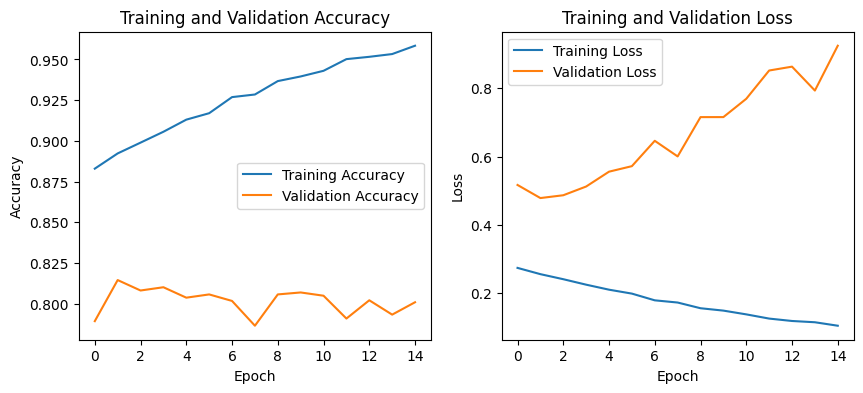

In [2]:
history = model.fit(X, y, batch_size=32, epochs=15, validation_split=0.1)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

780/780 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step


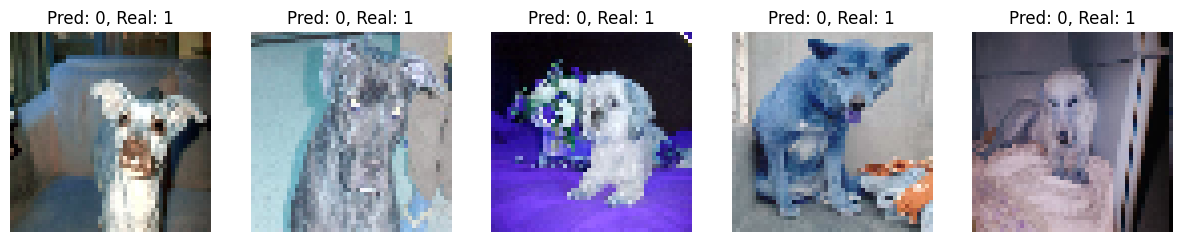

In [11]:
predictions = model.predict(X)
predicted_classes = (predictions > 0.5).astype("int32")

incorrect_indices = np.where(predicted_classes.flatten() != y)[0]


# Plot incorrect predictions
fig, axes = plt.subplots(nrows=1, ncols=min(5, len(incorrect_indices)), figsize=(15, 3))
for ax, idx in zip(axes, incorrect_indices[:5]):
    ax.imshow(X[idx])  # No need to reshape
    ax.title.set_text(f"Pred: {predicted_classes[idx][0]}, Real: {y[idx]}")
    ax.axis('off')
plt.show()

780/780 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step


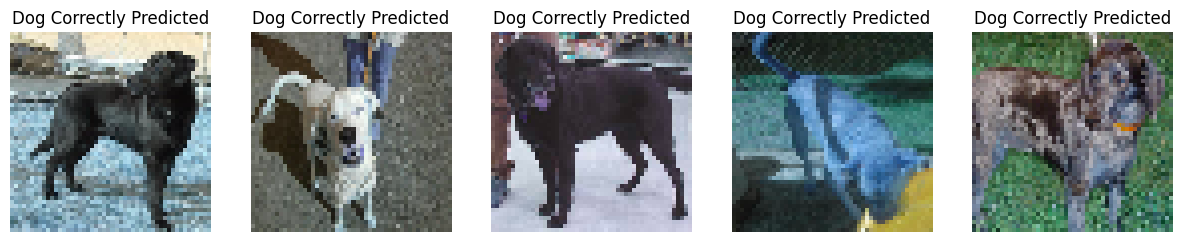

In [10]:
# Plot correct dog predictions
predictions = model.predict(X)
predicted_classes = (predictions > 0.5).astype("int32")

correct_dog_indices = np.where((predicted_classes.flatten() != y) & (y == 1))[0]

fig, axes = plt.subplots(nrows=1, ncols=min(5, len(correct_dog_indices)), figsize=(15, 3))
for ax, idx in zip(axes, correct_dog_indices[:5]):
    if num_channels == 1:
        ax.imshow(X[idx].reshape(img_height, img_width), cmap='gray')
    else:
        ax.imshow(X[idx])
    ax.title.set_text("Dog Correctly Predicted")
    ax.axis('off')
plt.show()

780/780 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step


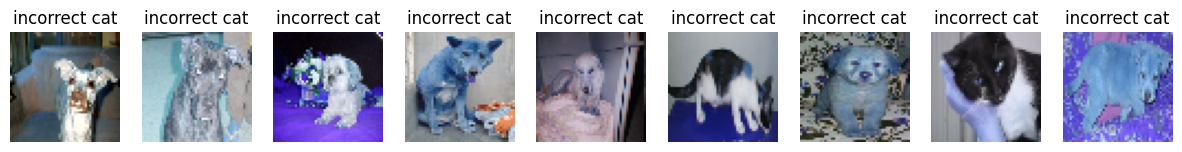

In [24]:
# Plot incorrect cat predictions
predictions = model.predict(X_loaded)
predicted_classes = (predictions > 0.5).astype("int32")

incorrect_cat_indices = np.where((predicted_classes.flatten() != y_loaded))[0]

fig, axes = plt.subplots(nrows=1, ncols=min(9, len(incorrect_cat_indices)), figsize=(15, 3))
for ax, idx in zip(axes, incorrect_cat_indices[:9]):
    ax.imshow(X_loaded[idx])
    ax.title.set_text("incorrect cat")
    ax.axis('off')
plt.show()

DATA AUGMENTATION

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Epoch 1/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 34s 38ms/step - accuracy: 0.6053 - loss: 0.6511 - val_accuracy: 0.7339 - val_loss: 0.5292
Epoch 2/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - accuracy: 0.7579 - loss: 0.5011 - val_accuracy: 0.7571 - val_loss: 0.4961
Epoch 3/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.7895 - loss: 0.4506 - val_accuracy: 0.7691 - val_loss: 0.4764
Epoch 4/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.8137 - loss: 0.4059 - val_accuracy: 0.7900 - val_loss: 0.4496
Epoch 5/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.8360 - loss: 0.3600 - val_accuracy: 0.7892 - val_loss: 0.4351
Epoch 6/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.8635 - loss: 0.3151 - val_accuracy: 0.7948 - val_loss: 0.4434
Epoch 7/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.8861 - loss: 0.2672 - val_accuracy: 0.7844 - val_loss: 0.4844
Epoch 8/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.9046 - loss: 0.2250 - 

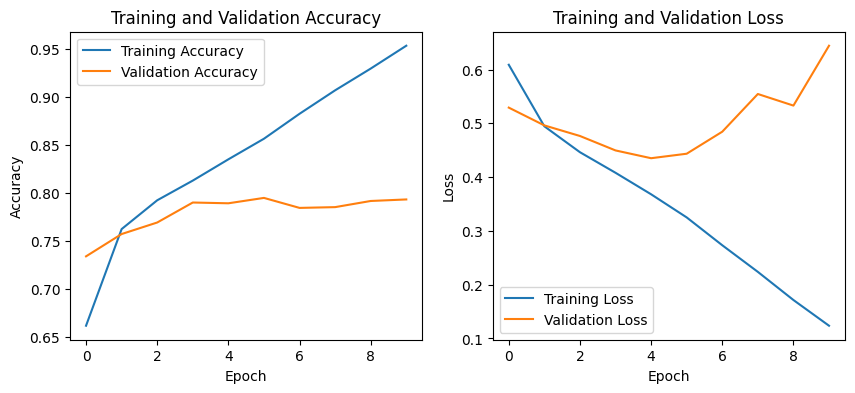

In [4]:
# Constants
DATADIR = r'C:\Users\vales\OneDrive\Escritorio\kagglecatsanddogs_5340 (1)\PetImages'
CATEGORIES = ['Cat', 'Dog']
IMG_SIZE = 50
TRAINING_DATA_PATH = r'C:\Users\vales\OneDrive\Escritorio\training_data.pickle'
FILEPATH_X = r'C:\Users\vales\OneDrive\Escritorio\X.pickle'
FILEPATH_Y = r'C:\Users\vales\OneDrive\Escritorio\y.pickle'
MODEL_SAVE_PATH = r'C:\Users\vales\OneDrive\Escritorio\cat_dog_model.h5'

def load_and_preprocess_image(path):
    img_array = cv2.imread(path, cv2.IMREAD_COLOR) 
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array

def create_training_data():
    training_data = []
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = load_and_preprocess_image(os.path.join(path, img))
                training_data.append([img_array, class_num])
            except Exception as e:
                pass
    random.shuffle(training_data)
    return training_data

def save_training_data(training_data):
    with open(TRAINING_DATA_PATH, 'wb') as f:
        pickle.dump(training_data, f)

def load_training_data():
    with open(TRAINING_DATA_PATH, 'rb') as f:
        return pickle.load(f)

def prepare_data(training_data):
    X = []
    y = []
    for features, label in training_data:
        X.append(features)
        y.append(label)
    X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)  
    y = np.array(y)
    return X, y

def save_data(X, y, filepath_X, filepath_y):
    with open(filepath_X, 'wb') as f:
        pickle.dump(X, f)
    with open(filepath_y, 'wb') as f:
        pickle.dump(y, f)

def load_data(filepath_X, filepath_y):
    with open(filepath_X, 'rb') as f:
        X = pickle.load(f)
    with open(filepath_y, 'rb') as f:
        y = pickle.load(f)
    return X, y

def build_model(input_shape):
    model = Sequential()
    model.add(Conv2D(64, (3, 3), input_shape=input_shape))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation("relu"))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def main():
    training_data = create_training_data()
    save_training_data(training_data)
    training_data = load_training_data()

    X, y = prepare_data(training_data)
    save_data(X, y, FILEPATH_X, FILEPATH_Y)

    X, y = load_data(FILEPATH_X, FILEPATH_Y)
    X = X / 255.0  

    # Split data into training and validation sets
    validation_split = 0.1
    split_idx = int(len(X) * (1 - validation_split))
    X_train, X_val = X[:split_idx], X[split_idx:]
    y_train, y_val = y[:split_idx], y[split_idx:]

    model = build_model(X_train.shape[1:])

    # Data Augmentation
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    datagen.fit(X_train)

    history = model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1)

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()


if __name__ == "__main__":
    main()

L1/L2 Regularization

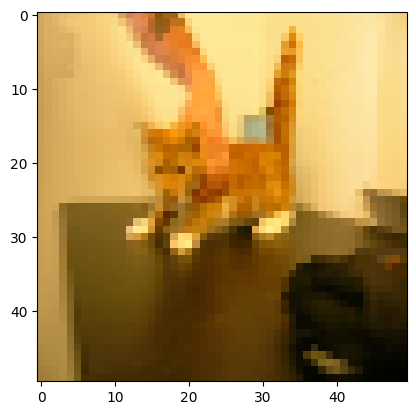

24946
0
0
0
0
0
0
1
0
0
0


c:\Users\vales\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - accuracy: 0.6044 - loss: 0.7114 - val_accuracy: 0.7279 - val_loss: 0.5805
Epoch 2/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - accuracy: 0.7266 - loss: 0.5757 - val_accuracy: 0.7627 - val_loss: 0.5276
Epoch 3/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.7688 - loss: 0.5246 - val_accuracy: 0.7423 - val_loss: 0.5482
Epoch 4/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 28s 40ms/step - accuracy: 0.7765 - loss: 0.5091 - val_accuracy: 0.7691 - val_loss: 0.5277
Epoch 5/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.7928 - loss: 0.4855 - val_accuracy: 0.7864 - val_loss: 0.5116
Epoch 6/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.8095 - loss: 0.4711 - val_accuracy: 0.7976 - val_loss: 0.5218
Epoch 7/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.8149 - loss: 0.4623 - val_accuracy: 0.8000 - val_loss: 0.4901
Epoch 8/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.8246 - loss: 0.4498 - 

In [5]:
from tensorflow.keras.regularizers import l2

DATADITR = r'C:\Users\vales\OneDrive\Escritorio\kagglecatsanddogs_5340 (1)\PetImages'
CATEGORIES = ['Cat', 'Dog']
IMG_SIZE = 50


new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

training_data = []

def creating_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADITR, category)  # path to cats or dogs dir
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

creating_training_data()
print(len(training_data))

random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])

X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

X = X / 255.0

filepath_X = 'C:/Users/vales/OneDrive/Escritorio/X.pickle'
filepath_y = 'C:/Users/vales/OneDrive/Escritorio/y.pickle'

with open(filepath_X, 'wb') as f:
    pickle.dump(X, f)

with open(filepath_y, 'wb') as f:
    pickle.dump(y, f)

with open(filepath_X, 'rb') as f:
    X_loaded = pickle.load(f)

with open(filepath_y, 'rb') as f:
    y_loaded = pickle.load(f)

# Build the model with L2 regularization
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:], kernel_regularizer=l2(0.001)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_regularizer=l2(0.001)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, kernel_regularizer=l2(0.001)))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1)

ADDING A CONVOLUTIONAL LAYER

Epoch 1/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 31s 41ms/step - accuracy: 0.5730 - loss: 0.6687 - val_accuracy: 0.7130 - val_loss: 0.5608
Epoch 2/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - accuracy: 0.7274 - loss: 0.5443 - val_accuracy: 0.7643 - val_loss: 0.4824
Epoch 3/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 28s 40ms/step - accuracy: 0.7818 - loss: 0.4574 - val_accuracy: 0.7707 - val_loss: 0.4758
Epoch 4/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 28s 40ms/step - accuracy: 0.8113 - loss: 0.4105 - val_accuracy: 0.8076 - val_loss: 0.4220
Epoch 5/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 28s 39ms/step - accuracy: 0.8349 - loss: 0.3693 - val_accuracy: 0.8160 - val_loss: 0.4023
Epoch 6/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.8538 - loss: 0.3332 - val_accuracy: 0.7964 - val_loss: 0.4556
Epoch 7/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.8688 - loss: 0.3045 - val_accuracy: 0.8269 - val_loss: 0.3877
Epoch 8/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 28s 39ms/step - accuracy: 0.8824 - loss: 0.2699 - 

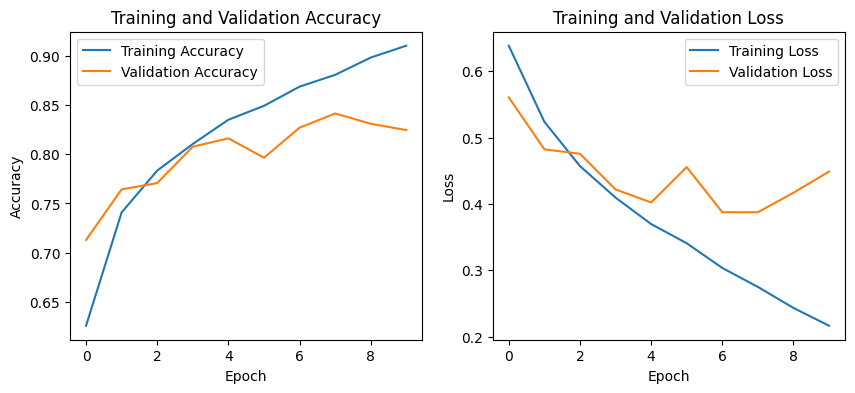

In [6]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

X = X / 255.0

filepath_X = 'C:/Users/vales/OneDrive/Escritorio/X.pickle'
filepath_y = 'C:/Users/vales/OneDrive/Escritorio/y.pickle'

with open(filepath_X, 'wb') as f:
    pickle.dump(X, f)

with open(filepath_y, 'wb') as f:
    pickle.dump(y, f)


with open(filepath_X, 'rb') as f:
    X_loaded = pickle.load(f)

with open(filepath_y, 'rb') as f:
    y_loaded = pickle.load(f)


model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding an additional convolutional and max pooling layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])


history = model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Combining L1/L2 regularization with and additional convolutional layer

In [7]:
training_data = []

def creating_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADITR, category)  # path to cats or dogs dir
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

creating_training_data()
print(len(training_data))

random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])


X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

X = X / 255.0

filepath_X = 'C:/Users/vales/OneDrive/Escritorio/X.pickle'
filepath_y = 'C:/Users/vales/OneDrive/Escritorio/y.pickle'

with open(filepath_X, 'wb') as f:
    pickle.dump(X, f)

with open(filepath_y, 'wb') as f:
    pickle.dump(y, f)


with open(filepath_X, 'rb') as f:
    X_loaded = pickle.load(f)

with open(filepath_y, 'rb') as f:
    y_loaded = pickle.load(f)


model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:], kernel_regularizer=l2(0.001)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_regularizer=l2(0.001)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3), kernel_regularizer=l2(0.001)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, kernel_regularizer=l2(0.001)))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])


model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1)

24946
1
0
0
1
0
1
1
1
0
1
Epoch 1/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 31s 41ms/step - accuracy: 0.5333 - loss: 0.7571 - val_accuracy: 0.6000 - val_loss: 0.6699
Epoch 2/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.6441 - loss: 0.6436 - val_accuracy: 0.6758 - val_loss: 0.6119
Epoch 3/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.7136 - loss: 0.5769 - val_accuracy: 0.6894 - val_loss: 0.6192
Epoch 4/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.7417 - loss: 0.5477 - val_accuracy: 0.7559 - val_loss: 0.5387
Epoch 5/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7701 - loss: 0.5163 - val_accuracy: 0.7671 - val_loss: 0.5188
Epoch 6/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7871 - loss: 0.4977 - val_accuracy: 0.7808 - val_loss: 0.4965
Epoch 7/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7879 - loss: 0.4939 - val_accuracy: 0.8000 - val_loss: 0.4821
Epoch 8/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy